In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Indicators.csv')
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [3]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [5]:
np.sort(data['CountryName'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Asia & Pacific (all income levels)',
       'East Asia & Pacific (de

While checking the above output, we saw that there are some values in CountryName column which were not actual country names, so below we collect those names and remove it from dataframe

In [6]:
list_of_not_countries=['Arab World', 'Caribbean small states', 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)', 'Euro area',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)', 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)', 'High income',
 'High income: nonOECD', 'High income: OECD',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Least developed countries: UN classification', 'Low & middle income',
 'Low income', 'Lower middle income',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)', 'Middle income',
 'North America' 'OECD members' ,'Other small states',
 'Pacific island small states', 'Small states', 'South Asia',
 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)' ,'Upper middle income' ,'World', 'North America', 'OECD members']

In [7]:
len(list_of_not_countries)

34

In [8]:
df=data[data['CountryName'].isin(list_of_not_countries)!=1]

In [9]:
df=df[df['IndicatorCode']=='NY.GNP.PCAP.CD'] # Code for checking gni per capita, atlas method

In [10]:
np.sort(df['CountryName'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia, The',
       'Georgia', 'Germany', 'Ghana',

In [11]:
df['Year'].describe()

count    7695.000000
mean     1991.878752
std        14.493690
min      1962.000000
25%      1980.000000
50%      1994.000000
75%      2004.000000
max      2014.000000
Name: Year, dtype: float64

Checking GNI in 1962 and 2014, min and max values

# Finding the top 15 countries with lowest GNI in 2014

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7695 entries, 54348 to 5641300
Data columns (total 6 columns):
CountryName      7695 non-null object
CountryCode      7695 non-null object
IndicatorName    7695 non-null object
IndicatorCode    7695 non-null object
Year             7695 non-null int64
Value            7695 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 420.8+ KB


In [13]:
lowest_gni2014=df[df['Year']==2014].sort_values('Value').head(15)
country_names_low_2014=lowest_gni2014['CountryName'].values.tolist()

In [14]:
country_names_low_2014

['Malawi',
 'Burundi',
 'Central African Republic',
 'Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Madagascar',
 'Guinea',
 'Ethiopia',
 'Guinea-Bissau',
 'Togo',
 'Mozambique',
 'Mali',
 'Uganda',
 'Afghanistan']

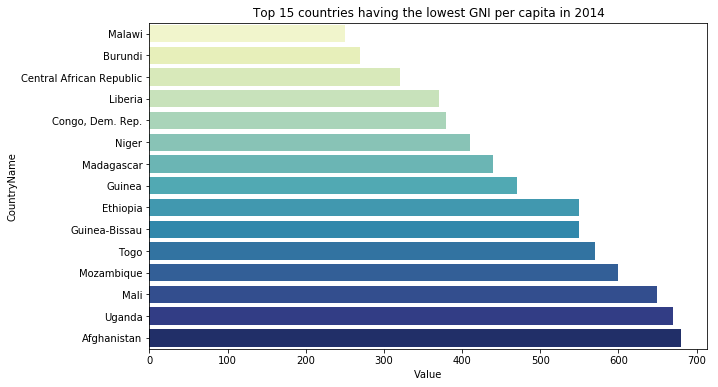

In [15]:
plt.figure(figsize=(10,6))
plt.title('Top 15 countries having the lowest GNI per capita in 2014')
plt.xlabel('GNI per capita')
plt.ylabel('Country Names')
#plt.ylabel('Country Names')
sns.barplot(x='Value',y='CountryName',palette="YlGnBu",data=lowest_gni2014)
plt.savefig('lowGNI2014.png',dpi=300)

# Finding top 15 countries having high GNI per capita in 2014

In [16]:
highest_gni2014=df[df['Year']==2014].sort_values('Value',ascending=False).head(15)
country_names_high_2014=highest_gni2014['CountryName'].values.tolist()

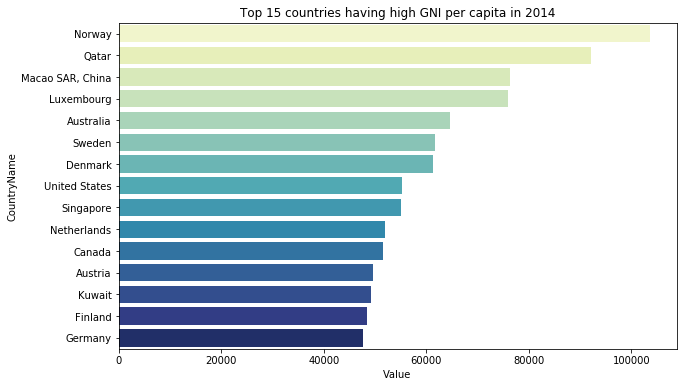

In [17]:
plt.figure(figsize=(10,6))
plt.title('Top 15 countries having high GNI per capita in 2014')
plt.xlabel('Values')
sns.barplot(x='Value',y='CountryName',data=highest_gni2014,palette='YlGnBu')
plt.savefig('highGNI2014.png',dpi=300)

# Finding top 15 countries having high GNI in 1962

In [18]:
highest_gni1962=df[df['Year']==1962].sort_values('Value',ascending=False).head(15)
country_names_high_1962=highest_gni1962['CountryName'].values.tolist()

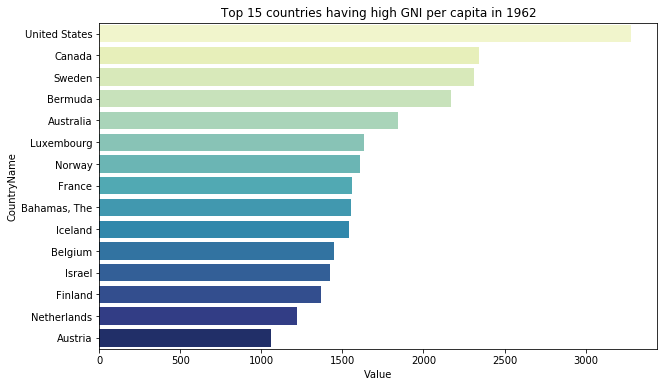

In [19]:
plt.figure(figsize=(10,6))
plt.title('Top 15 countries having high GNI per capita in 1962')

#plt.xticks(fontsize=20)
sns.barplot(x='Value',y='CountryName',data=highest_gni1962,palette='YlGnBu')
plt.savefig('highGNI1962.png',dpi=300)

# Finding top 15 countries having lowest GNI in 1962

In [20]:
lowest_gni1962=df[df['Year']==1962].sort_values('Value').head(15)
country_names_low_1962=lowest_gni1962['CountryName'].values.tolist()

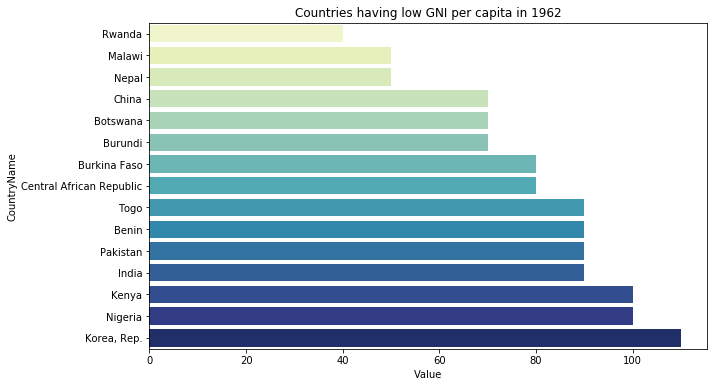

In [21]:
plt.figure(figsize=(10,6))
plt.title('Countries having low GNI per capita in 1962')
sns.barplot(x='Value',y='CountryName',data=lowest_gni1962,palette='YlGnBu')
plt.savefig('lowGNI1962.png')

In [22]:
consistent_rich=[]
consistent_poor=[]
for i in country_names_high_1962:
    for j in country_names_high_2014:
        if j==i:
            consistent_rich.append(j)
for i in country_names_low_1962:
    for j in country_names_low_2014:
        if j==i:
            consistent_poor.append(j)

Consistently Poor Countries:-

In [23]:
for i in consistent_poor:
    print(i)

Malawi
Burundi
Central African Republic
Togo


Consistently Rich Countries:-

In [24]:
for i in consistent_rich:
    print(i)

United States
Canada
Sweden
Australia
Luxembourg
Norway
Finland
Netherlands
Austria


# GNI per capita graph of consistently poor countries 

In [25]:
rich_df=df[df['CountryName'].isin(consistent_rich)]

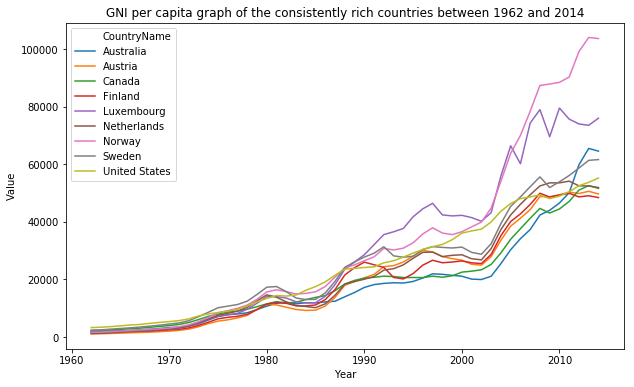

In [26]:
plt.figure(figsize=(10,6))
plt.title('GNI per capita graph of the consistently rich countries between 1962 and 2014')
sns.lineplot(x='Year',y='Value',hue='CountryName',data=rich_df)
plt.savefig('ConsistentlyRichCountriesGraph.png',dpi=300)

# GNI per capita graph of consistently poor countries

In [27]:
poor_df=df[df['CountryName'].isin(consistent_poor)]

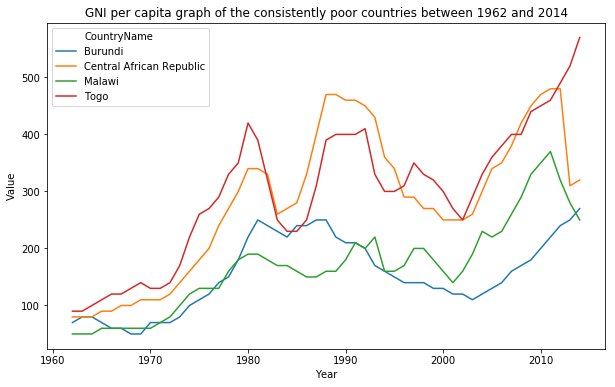

In [28]:
plt.figure(figsize=(10,6))
plt.title('GNI per capita graph of the consistently poor countries between 1962 and 2014')
sns.lineplot(x='Year',y='Value',hue='CountryName',data=poor_df)
plt.savefig('ConsistentlyPoorCountriesGraph.png',dpi=300)

From the above two graph, we can notice that the graph of rich countries is somewhat stable compared to the graph of poor countries, which has lots of ups and downs over the years

# Added Bonus


GNI per capita of india over the years, and comparison between India, China, Pakistan, USA, Indonesia, Brazil. Top 6 populated countries of the world.

In [29]:
populated_countries=['India','China','Pakistan','United States','Indonesia','Brazil']

In [30]:
populated_df=df[df['CountryName'].isin(populated_countries)]
#populated_df['Value']=populated_df['Value']/1000
#populated_df=df[df['CountryName'].isin(['India','Indonesia'])]

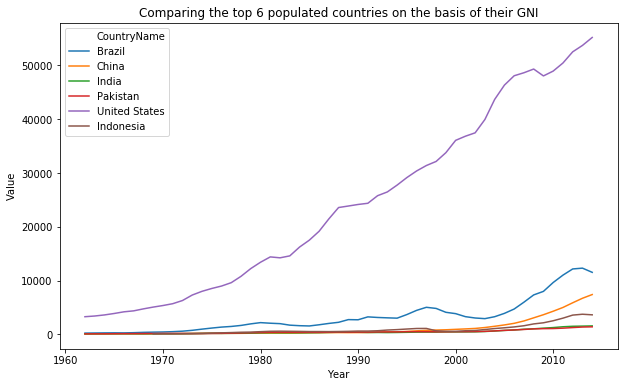

In [32]:
plt.figure(figsize=(10,6))
plt.title('Comparing the top 6 populated countries on the basis of their GNI')
sns.lineplot(x='Year',y='Value',hue='CountryName',data=populated_df)
plt.savefig('Comparingtop6populated.png',dpi=300)